# GLM model analyzer

**Motivation:** while a GLM model generates a output csv file with both modeled data and predicted probabilities. This script aims to analyzese these probabilities with respect to fitted data

### Load data

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import calibration_curve


In [14]:
path = r"C:\Users\Stoja\OneDrive\Documents\diplomka\scr\jupyter_notebook\R_script\glm_prediction_step_lasso_ridge.csv"

In [15]:
df = pd.read_csv(path)
#df.set_index('ID_person', inplace=True)
print(df.shape)
df.head()

(3925, 47)


,ID_person,vizier,r.P.nb,mniw.Nxn...zAw.Nxn,imy.rA.wabty,imy.rA.5maw,cmcw.cnwt,xrp.iAwt.nbwt.nTrwt,imy.rA.prwy.nbw,imAxw,...,cmr.waty,aA.8wAw,imy.rA.zS.w..a.w...nw..ncwt,Hry.cStA,imy.rA.prwy.HD,imA.a,iry.pat,y_step,y_lasso,y_ridge
0,322,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000767,0.00061,0.000364
1,323,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000767,0.00061,0.000364
2,324,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000767,0.00061,0.000364
3,325,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000767,0.00061,0.000364
4,326,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000767,0.00061,0.000364


### Make histogram

In [16]:
def plot_cdf(data, column_name):
    """
    Plot a Cumulative Density Function (CDF) with jittered points below the x-axis
    for a specified column in the dataset, grouped by 'vizier' levels.

    Parameters:
    - data (pd.DataFrame): The dataset containing the data to plot.
    - column_name (str): The name of the column for which to plot the CDF and jittered points.
    """
    vizier_levels = data['vizier'].unique()  # Get unique vizier levels
    plt.figure(figsize=(10, 6))
    
    for level in vizier_levels:
        subset = data[data['vizier'] == level]

        # For vizier == 0, select the top 20% of points
        if level == 0:
            subset = subset[subset[column_name] >= subset[column_name].quantile(0.98)]
        
        # Plot the CDF
        sns.ecdfplot(
            subset[column_name],
            label=f'vizier = {level}'
        )
        
        # Define vertical jitter range based on vizier level, all below y=0
        if level == 0:
            jitter_base = -0.11  # Base for vizier = 0
        else:
            jitter_base = -0.04  # Base for vizier = 1
        
        # Apply jitter around the base for each level
        jitter = np.random.uniform(-0.025, 0.025, len(subset))  # Narrow vertical jitter range
        plt.scatter(
            subset[column_name],             # Fixed x-coordinate for probabilities
            [jitter_base + j for j in jitter],  # Apply jitter to the y-axis points
            alpha=0.6,
            label=f'Points (vizier = {level})',
            s=40,  # Larger point size for better visibility
            marker="x"  # Set point style to "x"
        )
    
    plt.title(f'CDF for {column_name}')
    plt.xlabel('Predicted probability')
    plt.ylabel('CDF')
    plt.xlim(0, 1)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    plt.savefig(rf'img/cdf_plot_{column_name}.png', dpi=600, bbox_inches='tight')  # Adjust dpi and bounding box if needed
    plt.show()

In [17]:
def plot_cdf(y_true, y_hat, column_name):
    """
    Plot a Cumulative Density Function (CDF) with jittered points below the x-axis
    for a specified column in the dataset, grouped by 'vizier' levels.

    Parameters:
    - data (pd.DataFrame): The dataset containing the data to plot.
    - column_name (str): The name of the column for which to plot the CDF and jittered points.
    """
    levels = y_true.unique()  # Get unique vizier levels
    plt.figure(figsize=(10, 6))
    
    for level in levels:
        mask = (y_true == level)
        subset = y_hat[mask]

        # For vizier == 0, select the top 20% of points
        if level == 0:
            subset = subset[subset >= subset.quantile(0.98)]
        
        # Plot the CDF
        sns.ecdfplot(
            subset,
            label=f'vizier = {level}'
        )
        
        # Define vertical jitter range based on vizier level, all below y=0
        if level == 0:
            jitter_base = -0.11  # Base for vizier = 0
        else:
            jitter_base = -0.04  # Base for vizier = 1
        
        # Apply jitter around the base for each level
        jitter = np.random.uniform(-0.025, 0.025, len(subset))  # Narrow vertical jitter range
        plt.scatter(
            subset,             # Fixed x-coordinate for probabilities
            [jitter_base + j for j in jitter],  # Apply jitter to the y-axis points
            alpha=0.6,
            label=f'Points (vizier = {level})',
            s=40,  # Larger point size for better visibility
            marker="x"  # Set point style to "x"
        )
    
    plt.title(f'CDF for {column_name}')
    plt.xlabel('Predicted probability')
    plt.ylabel('CDF')
    plt.xlim(0, 1)  # Set x-axis limits
    plt.legend()
    plt.grid(True)

    plt.savefig(rf'img/cdf_plot_{column_name}.png', dpi=600, bbox_inches='tight')  # Adjust dpi and bounding box if needed
    plt.show()

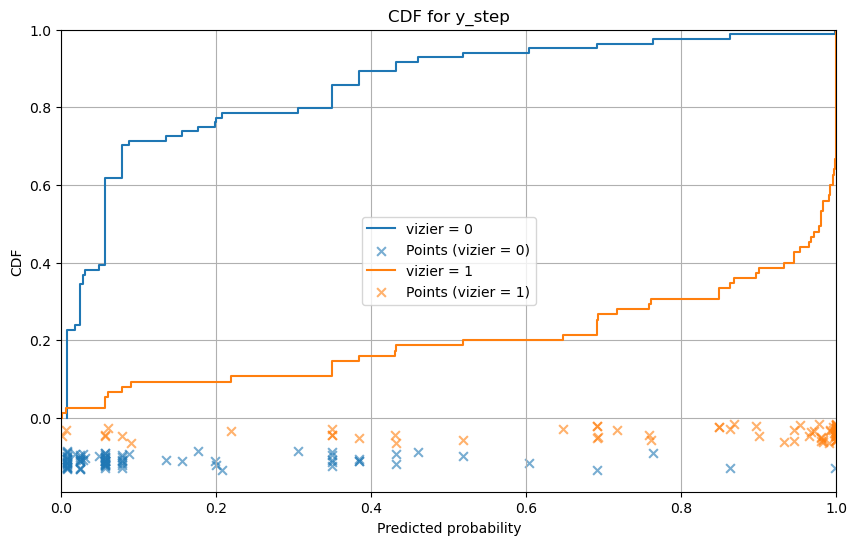

In [18]:
plot_cdf(df['vizier'], df['y_step'], 'y_step')

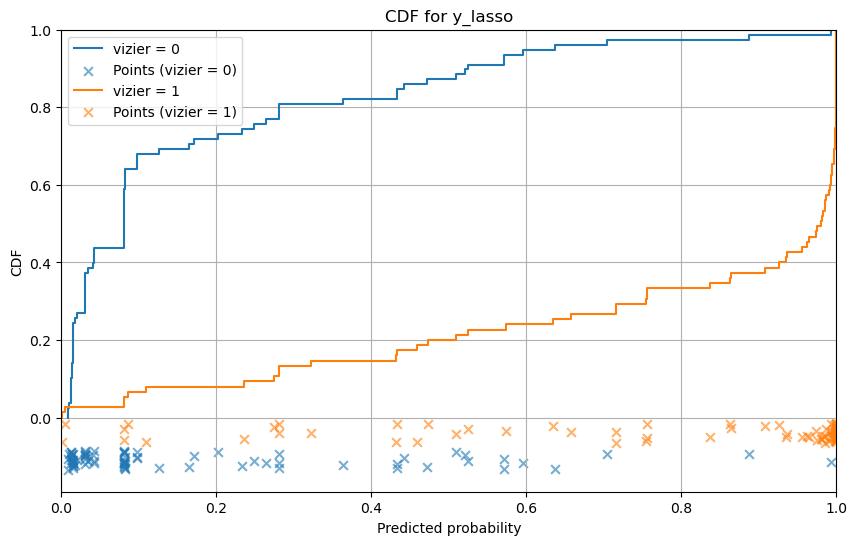

In [19]:
plot_cdf(df['vizier'], df['y_lasso'], 'y_lasso')

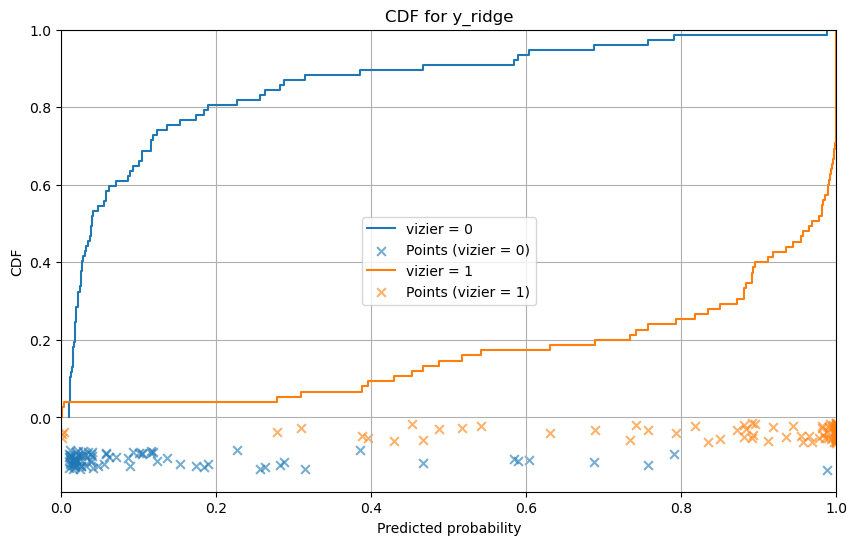

In [20]:
plot_cdf(df['vizier'], df['y_ridge'], 'y_ridge')

### ROC plot

In [21]:
def plor_roc(data, column_name):
    y_true = data['vizier']
    y_hat = data[column_name]
    
    # Calculate FPR, TPR, and thresholds
    fpr, tpr, thresholds = roc_curve(y_true, y_hat)
    
    # Calculate AUC
    auc = roc_auc_score(y_true, y_hat)
    
    # Plot the ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  # Dashed diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.grid()
    
    plt.savefig(rf'img/roc_plot_{column_name}.png', dpi=600, bbox_inches='tight')  # Adjust dpi and bounding box if needed
    plt.show()

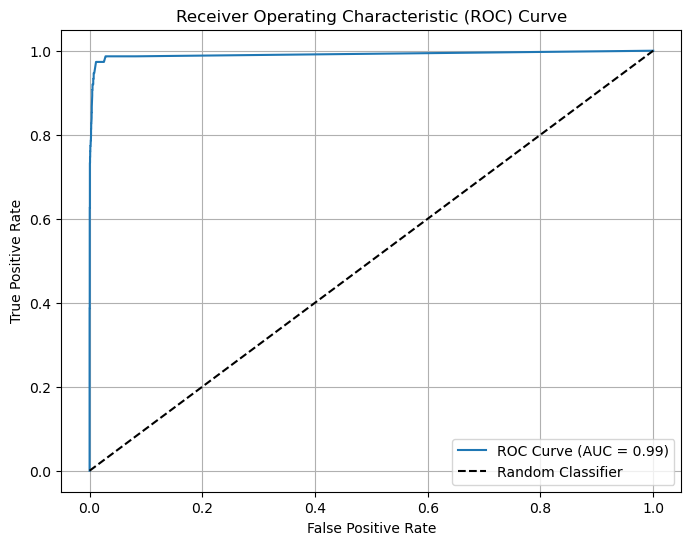

In [22]:
plor_roc(df, 'y_lasso')

### Make reliability plot

In [23]:
def reliability_plot(data):
    # Extract relevant columns for plotting
    ground_truth = data['vizier']
    probability_columns = ['y_step', 'y_lasso', 'y_ridge']
    markers = ['o', 's', '^']
    
    # Plot reliability curves for each model
    plt.figure(figsize=(12, 8))
    for col, marker in zip(probability_columns, markers):
        # Compute calibration curve
        prob_true, prob_pred = calibration_curve(ground_truth, data[col], n_bins=10, strategy='uniform')
        plt.plot(prob_pred, prob_true, marker=marker, label=f'Model: {col}')
    
    # Add diagonal reference line
    plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
    
    # Customize plot
    plt.title('Reliability Plot')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.legend()
    plt.grid()

    plt.savefig(rf'img/reliability_plot.png', dpi=600, bbox_inches='tight')  # Adjust dpi and bounding box if needed
    plt.show()

In [24]:
reliability_plot(df, ['y_step', 'y_lasso', 'y_ridge'])

TypeError: reliability_plot() takes 1 positional argument but 2 were given